In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = 'all'
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3NhbWZvcmVtYW4vcHJvamVjdHMvc2Fmb3JlbTIvcGVyc29uYWxfc2l0ZV9DTEVBTi9wcm9qZWN0cy9ocGMtYm9vdGNhbXAtMjAyNS8wMS1uZXVyYWwtbmV0d29ya3MvNC1yZXByZXNlbnRhdGlvbi1sZWFybmluZw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/importlib/_bootstrap.py": 1738868689.7343743, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/importlib/_bootstrap_external.py": 1738868689.7405775, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/zipimport.py": 1738868687.674339, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/codecs.py": 1738868686.9707906, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/encodings/aliases.py": 1738868688.3587308, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/encodings/__init__.py": 1738868688.3530793, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/encodings/utf_8.py": 1738868689.0400195, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/abc.py": 1738868686.884046, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/io.py": 1738868687.170621, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/stat.py": 1738868687.4856465, "/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/_collections_abc.py": 173

In [2]:
import os
import sys
if sys.platform == "darwin":
    os.environ["TORCH_DEVICE"] = "cpu"
    os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = "1"

In [3]:
import numpy, random
import torch
import torchvision
from torchvision.transforms import v2


import torch.distributed as dist
import torch.nn as nn
import torch.optim as optim
import torch.multiprocessing as mp

from torch.nn.parallel import DistributedDataParallel as DDP

batch_size = 128

In [4]:
from torch import nn

class Downsampler(nn.Module):

    def __init__(self, in_channels, out_channels, stride=2):
        super(Downsampler, self).__init__()

        self.norm = nn.InstanceNorm2d(in_channels)

        self.downsample = nn.Conv2d(
            in_channels=in_channels, 
            out_channels=out_channels,
            kernel_size = stride,
            stride = stride,
        )
    
    def forward(self, inputs):

        return self.downsample(self.norm(inputs))
        
        

class ConvNextBlock(nn.Module):
    """This block of operations is loosely based on this paper:

    """


    def __init__(self, in_channels):
        super(ConvNextBlock, self).__init__()

        # Depthwise, seperable convolution with a large number of output filters:
        self.conv1 = nn.Conv2d(in_channels=in_channels, 
                                     out_channels=in_channels, 
                                     groups=in_channels,
                                     kernel_size=[7,7],
                                     padding='same' )

        self.norm = nn.InstanceNorm2d(in_channels)

        # Two more convolutions:
        self.conv2 = nn.Conv2d(in_channels=in_channels, 
                                     out_channels=4*in_channels,
                                     kernel_size=1)

        self.conv3 = nn.Conv2d(in_channels=4*in_channels, 
                                     out_channels=in_channels,
                                     kernel_size=1
                                     )


    def forward(self, inputs):
        x = self.conv1(inputs)

        # The normalization layer:
        x = self.norm(x)

        x = self.conv2(x)

        # The non-linear activation layer:
        x = torch.nn.functional.gelu(x)

        x = self.conv3(x)

        # This makes it a residual network:
        return x + inputs
    

class Classifier(nn.Module):


    def __init__(self, n_initial_filters, n_stages, blocks_per_stage, n_outputs):
        super(Classifier, self).__init__()

        # This is a downsampling convolution that will produce patches of output.

        # This is similar to what vision transformers do to tokenize the images.
        self.stem = nn.Conv2d(in_channels=3,
                                    out_channels=n_initial_filters,
                                    kernel_size=1,
                                    stride=1)
        
        self.norm1 = nn.InstanceNorm2d(n_initial_filters)

        current_n_filters = n_initial_filters
        
        self.layers = nn.Sequential()
        for n_blocks in range(n_stages):
            # Add a convnext block series:
            for _ in range(blocks_per_stage):
                self.layers.append(ConvNextBlock(in_channels=current_n_filters))
            # Add a downsampling layer:
            self.layers.append(Downsampler(in_channels=current_n_filters, out_channels=2*current_n_filters))
            # Double the number of filters:
            current_n_filters = 2*current_n_filters


        self.head = nn.Sequential(
            nn.Flatten(),
            nn.LayerNorm(current_n_filters),
            nn.Linear(current_n_filters, n_outputs)
        )

    def forward(self, inputs):

        x = self.stem(inputs)
        # Apply a normalization after the initial patching:
        x = self.norm1(x)

        # Apply the main chunk of the network:
        x = self.layers(x)

        # Normalize and readout:
        x = nn.functional.avg_pool2d(x, x.shape[2:])
        x = self.head(x)

        return x

In [5]:
def create_representation_model(n_features, rank, size):

    model = Classifier(32, 2, 2, n_features)


    model.to(torch.get_default_device())

    return model

model = create_representation_model(256, 0, 1)

head = torch.nn.Sequential(
    nn.Linear(256,128),
)

head.to(torch.get_default_device())

from torchinfo import summary
    
print(summary(model, input_size=(batch_size, 3, 32, 32)))
print(summary(head, input_size=(batch_size, 256)))

Sequential(
  (0): Linear(in_features=256, out_features=128, bias=True)
)

Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 256]                --
├─Conv2d: 1-1                            [128, 32, 32, 32]         128
├─InstanceNorm2d: 1-2                    [128, 32, 32, 32]         --
├─Sequential: 1-3                        [128, 128, 8, 8]          --
│    └─ConvNextBlock: 2-1                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 32, 32, 32]         1,600
│    │    └─InstanceNorm2d: 3-2          [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-3                  [128, 128, 32, 32]        4,224
│    │    └─Conv2d: 3-4                  [128, 32, 32, 32]         4,128
│    └─ConvNextBlock: 2-2                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-5                  [128, 32, 32, 32]         1,600
│    │    └─InstanceNorm2d: 3-6          [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-7                  [128, 128, 32, 32]        4,224

In [6]:
def setup(rank, world_size):
    os.environ['MASTER_ADDR'] = 'localhost'
    os.environ['MASTER_PORT'] = '12355'

    # initialize the process group
    dist.init_process_group("gloo", rank=rank, world_size=world_size)

def cleanup():
    dist.destroy_process_group()

In [7]:
import ezpz

def create_data_loaders(transforms, batch_size, rank, seed):
    # Start up the data loader:
    # dev = torch.device(
    #     f"cuda:{rank}") if torch.cuda.is_available() else torch.device("cpu")
    dev = ezpz.get_torch_device_type()

    training_data = torchvision.datasets.CIFAR10(
        root="data",
        train=True,
        download=True,
        transform=transforms
    )

    training_data, validation_data = torch.utils.data.random_split(
        training_data,
        [0.8, 0.2],
        generator=torch.Generator().manual_seed(55))

    # The dataloader makes our dataset iterable 
    train_dataloader = torch.utils.data.DataLoader(training_data,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=8)

    val_dataloader = torch.utils.data.DataLoader(validation_data,
                                                 batch_size=batch_size,
                                                 shuffle=True,
                                                 num_workers=8)


    def preprocess(x, y):
        # CIFAR-10 is *color* images so 3 layers!
        return x.view(-1, 3, 32, 32).to(dev), y.to(dev)


    class WrappedDataLoader:
        def __init__(self, dl, func):
            self.dl = dl
            self.func = func

        def __len__(self):
            return len(self.dl)

        def __iter__(self):
            for b in self.dl:
                yield (self.func(*b))


    train_dataloader = WrappedDataLoader(train_dataloader, preprocess)
    val_dataloader = WrappedDataLoader(val_dataloader, preprocess)

    return train_dataloader, val_dataloader

In [8]:
# def demo_basic(rank, world_size, n_epochs):
#     print(f"Running basic DDP example on rank {rank}.")
#     setup(rank, world_size)


#     # create model and move it to GPU with id rank
#     model = ToyModel().to(rank)
#     ddp_model = DDP(model, device_ids=[rank])

#     loss_fn = nn.MSELoss()
#     optimizer = optim.SGD(ddp_model.parameters(), lr=0.001)

#     optimizer.zero_grad()
#     outputs = ddp_model(torch.randn(20, 10))
#     labels = torch.randn(20, 5).to(rank)
#     loss_fn(outputs, labels).backward()
#     optimizer.step()

#     cleanup()


# def run_demo(demo_fn, world_size):
#     mp.spawn(demo_fn,
#              args=(world_size,5),
#              nprocs=world_size,
#              join=True)

In [9]:
# import sys, os
# from multiprocessing import Pool
# from multiprocessing.reduction import ForkingPickler
# from types import FunctionType
# import cloudpickle

# assert sys.version_info >= (3, 8), 'python3.8 or greater required to use reducer_override'

# def reducer_override(obj):
#     if type(obj) is FunctionType:
#         return (cloudpickle.loads, (cloudpickle.dumps(obj),))
#     else:
#         return NotImplemented

# # Monkeypatch our function reducer into the pickler for multiprocessing.
# # Without this line, the main block will not work on windows or macOS.
# # Alterntively, moving the defintionn of foo outside of the if statement
# # would make the main block work on windows or macOS (when run from
# # the command line).
# ForkingPickler.reducer_override = staticmethod(reducer_override)

In [10]:
# This method is from the pytorch implementation of SimCLR:
# https://github.com/sthalles/SimCLR/blob/master/data_aug/contrastive_learning_dataset.py

def get_simclr_pipeline_transform(size, s=1):
    """Return a set of data augmentation transformations as described in the SimCLR paper."""
    color_jitter = v2.ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)
    data_transforms = v2.Compose([v2.RandomResizedCrop(size=size, scale=[0.85,1.0]),
                                          v2.RandomHorizontalFlip(),
                                          v2.RandomApply([color_jitter], p=0.8),
                                          v2.RandomGrayscale(p=0.2),
                                          v2.ToDtype(torch.float32, scale=True),  # Normalize expects float input
                                          # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                          # v2.ToTensor()
                                        ])
    return data_transforms

In [11]:
transforms1 = get_simclr_pipeline_transform((32,32))
transforms2 = get_simclr_pipeline_transform((32,32))

In [12]:
train, val = create_data_loaders(v2.ToTensor(), batch_size, 0, seed = 1234)

/Users/samforeman/projects/saforem2/personal_site_CLEAN/.venv/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


[2025-07-17 16:11:59][W][ezpz/dist:448] Caught 'TORCH_DEVICE'=cpu' from environment!

In [13]:
batch, (X, Y) = next(enumerate(train))

In [14]:
X1 = transforms1(X); X2 = transforms2(X)

print(type(X1))
print(type(X2))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

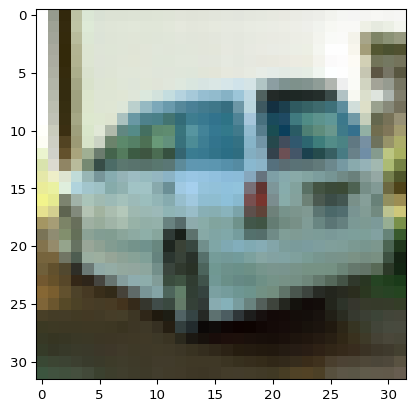

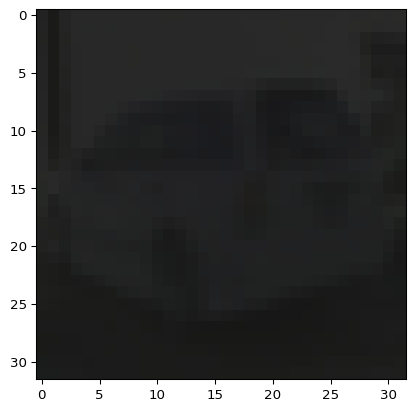

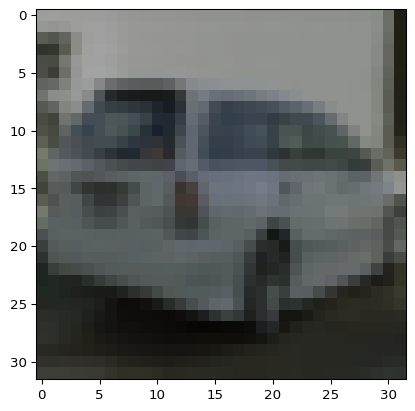

In [16]:
plt.imshow(X[0].cpu().permute((1,2,0))); plt.show()
plt.imshow(X1[0].cpu().permute((1,2,0))); plt.show()
plt.imshow(X2[0].cpu().permute((1,2,0))); plt.show()

In [17]:
def contrastive_loss(first_images, second_images, rank, world_size = 1, temperature=0.1):
        # Each image is represented with k parameters,
        # Assume the batch size is N, so the
        # inputs have shape (N, k)

        # These are pre-distributed shapes:
        N = first_images.shape[0]
        k = first_images.shape[1]


        first_images = first_images / torch.norm(first_images,dim=1).reshape((-1,1))
        second_images = second_images / torch.norm(second_images,dim=1).reshape((-1,1))

        # Take the two tuples, and concatenate them.
        # Then, reshape into Y = (1, 2N, k) and Z = (2N, 1, k)

        c = torch.concat([first_images, second_images], dim=0)

        # Gather all the c up if the world size > 1:
        if world_size > 1:
            gathered_c = torch.distributed.all_gather(tensor=c)
            gathered_c = gathered_c.reshape((-1, first_images.shape[-1]))
        else:
            gathered_c = c

        # Each rank computes only a slice of the global loss matrix, or
        # the memory usage gets out of control.

        # We calculate the dot product between the local and global tensors:
        local_reps = c.reshape((c.shape[0], 1, c.shape[1]))
        all_reps   = gathered_c.reshape((1, gathered_c.shape[0], gathered_c.shape[1]))


        # Assume we have n images per rank, for N global images with N = n * world_size
        # Compute the product of these tensors, which gives shape
        # (2n, 2N, k)
        mat =  local_reps*all_reps

        # We need to compute the function (sim(x,y)) for each element in the 2N sequent.
        # Since the are normalized, we're computing x^T . Y / (||x||*||y||),
        # but the norms are equal to 1.
        # So, summing the matrix over the dim = 0 and dim = 1 computes this for each pair.

        sim = torch.sum(mat, dim=-1) / temperature



        # Now, sim is of shape [2*n, 2*N]

        # This yields a symmetric matrix, diagonal entries equal 1.  Off diagonal are symmetrics and < 1.

        # sim = torch.exp(sim / temperature)
        # Now, for every entry i in C (concat of both batches), the sum of sim[i] - sim[i][i] is the denominator

        device = sim.device

        # Since we have a non-symmetric matrix, need to build a non-symmetric index:
        positive = torch.zeros(sim.shape, device=device)

        # We concatenated all the local examples, and compute symmetric positive pairs
        # So for the first N entries, the index of the positive pair is i + N  (locally)
        # For the second N entries, the index of the positive pair is i - N (locally)
        # with a distributed run, we've squashed all the similarity scores together.
        # to a shape of [2*N, 2*N*Size]
        # Each 2*N by 2*N block is the local positive indexes, all others are negative.
        # That means that the index is shifted by global_rank*2*N

        access_index_x = torch.arange(2*N)
        # For the first N, the y-index is equal to x + 2*N
        # For the second N
        access_index_y = torch.arange(2*N)
        # Shift by +/- N:
        access_index_y[0:N] = access_index_y[0:N] + N
        access_index_y[N:]  = access_index_y[N:] - N

        access_index_y +=  rank * 2*N

        # print("access_index_y: ", access_index_y, flush=True)

        positive[access_index_x, access_index_y] = 1

        # For the negative, we invert the positive and have to 0 out the self-index entries
        negative = 1 - positive

        # THESE WORK IF IT'S NOT DISTRIBUTED
        # positive = torch.tile(torch.eye(N, device=device), (2,2))
        # # Unsure if this line is needed?
        # positive = positive - torch.eye(2*N, device=device)
        #
        # negative = - (torch.eye(2*N, device=device) - 1)

        with torch.no_grad():
            # Here, we can compute the top-k metrics for this batch, since we have the global state:
            # We want the top 5 entries but the self-sim is obviously perfect.
            # So take the top 6 and reject the first.
            topk = torch.topk(sim, k=6, dim=-1, sorted=True)

            # Top 1 is just an equality check:
            top1_acc = topk.indices[:,1] == access_index_y.to(topk.indices.device)
            top1_acc = torch.mean(top1_acc.to(torch.float))
          
            # Top 5 is a little more complicated:
            # Compute the index distance to the correct index, abs value:
            top5_acc_dist = torch.abs(topk.indices[:,1:] - access_index_y.to(topk.indices.device).reshape(-1,1))
            # Get the minumum value, and see if it is less than 5:
            min_values, _ = torch.min(top5_acc_dist, dim=-1)
            top5_acc =  min_values < 5.
            # Average over the batch dimension:
            top5_acc = torch.mean(top5_acc.to(torch.float))


        negative_examples = sim * negative
        positive_examples = sim * positive

        # Now, positive/negative examples is the temperature normalized similarity.
        # we need to sum across the whole batch dimension to compute it per-example:


        # Compute the alignment, summed over the entire global batch:
        alignment = torch.sum(positive_examples, dim=-1)

        # Compute the exp, which we'll eventually sum and log:
        exp = torch.sum(torch.exp(negative_examples), dim=-1)

        # print("Alignment: ", alignment, flush=True)
        # print("exp: ",       exp, flush=True)


        # And compute the logsumexp of the negative examples:
        log_sum_exp = torch.log(exp )


        # Additionally, we can compute the "floor" of the loss at this batch size:
        # floor = torch.log(1.*N) - 1.

        loss_metrics = {
            "alignment"   : torch.mean(alignment),
            "log_sum_exp" : torch.mean(log_sum_exp),
            "top1"        : top1_acc,
            "top5"        : top5_acc,
            # "floor"       : floor,
        }

        loss = torch.mean( - alignment + log_sum_exp)
        return loss, loss_metrics

In [18]:
def train_one_epoch(dataloader, t1, t2, model, head, loss_fn, optimizer, rank, size, progress_bar):
    model.train()
    head.train()
    for (batch, (X, _)) in enumerate(dataloader):
        # forward pass
        X1 = t1(X); X2 = t2(X)
        pred1 = head(model(X1))
        pred2 = head(model(X2))
        loss, metrics = loss_fn(pred1, pred2, rank, size)

        # print(metrics)
        
        # backward pass calculates gradients
        loss.backward()
        
        # take one step with these gradients
        optimizer.step()
        
        # resets the gradients 
        optimizer.zero_grad()

        # progress_bar.refresh()
        cpu_metrics = { key : f"{metrics[key].detach().cpu().numpy():.2f}" for key in metrics.keys()}
        cpu_metrics["loss"] = f"{loss.detach().cpu().numpy():.2f}"
        progress_bar.update()
        progress_bar.set_postfix(cpu_metrics)
        # progress_bar.description = f"Train loss: {loss.cpu():.2f} top5: {metrics['top5'].cpu():.2f}"
        # break

In [19]:
def validate_one_epoch(dataloader, t1, t2, model, head, loss_fn, rank, size, progress_bar):
    model.train()
    head.train()
    n = 0.
    sum_metrics = None
    for (batch, (X, _)) in enumerate(dataloader):
        # forward pass
        X1 = t1(X); X2 = t2(X)
        pred1 = head(model(X1))
        pred2 = head(model(X2))
        loss, metrics = loss_fn(pred1, pred2, rank, size)

        # print(metrics)
        
        # backward pass calculates gradients
        loss.backward()
        
        # take one step with these gradients
        optimizer.step()
        
        # resets the gradients 
        optimizer.zero_grad()

        # progress_bar.refresh()
        cpu_metrics = { key : metrics[key].detach().cpu().numpy() for key in metrics.keys()}
        if sum_metrics is None: 
            sum_metrics = cpu_metrics
        else:
            for key in sum_metrics.keys():
                sum_metrics[key] += cpu_metrics[key]
        progress_bar.update()
        n += 1.
        # progress_bar.description = f"Train loss: {loss.cpu():.2f} top5: {sum_metrics['top5'].cpu():.2f}"
        # break
    
    for key in sum_metrics:
        sum_metrics[key] = sum_metrics[key] / n
    return sum_metrics

In [20]:
optimizer = torch.optim.AdamW(list(model.parameters()) + list(head.parameters()), lr=0.001)

In [21]:
from tqdm.notebook import tqdm


# for j in range(1):
#     # with tqdm(total=len(train), position=0, leave=True, desc=f"Train Epoch {j}") as train_bar1:
#
#     #     train_one_epoch(train, transforms1, transforms2, model, head, contrastive_loss, optimizer, 0, 1, train_bar1)
#
#     with tqdm(total=len(val), position=0, leave=True, desc=f"Validate Epoch {j}") as val_bar:
#         metrics = validate_one_epoch(val, transforms1, transforms2, model, head, contrastive_loss, 0, 1, val_bar)
#         print_metrics = {
#             key : f"{key}={metrics[key]:.2f}" for key in metrics.keys()
#         }
#         print_metrics = "; ".join(print_metrics.values())
#         print(f"Validate epoch {j}: ", print_metrics)

In [22]:
# Now, we retrain the classification head without touching the representation. This is called fine tuning.

In [23]:
def evaluate(dataloader, model, head, loss_fn, val_bar):
    # Set the model to evaluation mode - some NN pieces behave differently during training
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader)
    num_batches = len(dataloader)
    loss, correct = 0, 0

    # We can save computation and memory by not calculating gradients here - we aren't optimizing 
    with torch.no_grad():
        # loop over all of the batches
        for X, y in dataloader:

            pred = head(model(X))
            loss += loss_fn(pred, y).item()
            # how many are correct in this batch? Tracking for accuracy 
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            val_bar.update()
            
    loss /= num_batches
    correct /= (size*batch_size)
    
    accuracy = 100*correct
    return accuracy, loss

In [24]:
def fine_tune(dataloader, rep_model, head, loss_fn, optimizer, progress_bar):
    head.train()
    model.eval()
    for batch1, (X, Y) in enumerate(dataloader):
        # forward pass
        # Calling detach blocks all gradients into the representation model!
        rep = rep_model(X).detach()
        pred = head(rep)
        loss = loss_fn(pred, Y)
        
        
        # backward pass calculates gradients
        loss.backward()
        
        # take one step with these gradients
        optimizer.step()
        
        # resets the gradients 
        optimizer.zero_grad()

        correct = (pred.argmax(1) == Y).type(torch.float).mean().item()
                    
        # progress_bar.refresh()
        cpu_metrics = {}
        cpu_metrics["acc"] = f"{correct:.2f}"
        cpu_metrics["loss"] = f"{loss.detach().cpu().numpy():.2f}"
        progress_bar.update()
        progress_bar.set_postfix(cpu_metrics)
        # progress_bar.description = f"Train loss: {loss.cpu():.2f} top5: {metrics['top5'].cpu():.2f}"
        # break

In [25]:
classification_head = nn.Linear(256, 10)  # .cuda()
classification_loss = loss_fn = nn.CrossEntropyLoss()
fine_tune_optimizer = torch.optim.AdamW(classification_head.parameters(), lr=0.01)
print(fine_tune_optimizer)

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0.01
)


In [26]:
# for j in range(5):
#     with tqdm(total=len(train), position=0, leave=True, desc=f"Fine Tune Epoch {j}") as train_bar1:
#
#         fine_tune(train, model, classification_head, classification_loss, fine_tune_optimizer, train_bar1)
#     with tqdm(total=len(val), position=0, leave=True, desc=f"Validate Epoch {j}") as val_bar:
#         acc, loss = evaluate(val, model, classification_head, classification_loss, val_bar)
#         print(f"Epoch {j}: validation loss: {loss:.3f}, accuracy: {acc:.3f}")